## Source definition and analytical solution

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'Times New Roman'

def wave_solve_c(_dur, _dt, _r, _vp, _f):
    '''
    Function that solves the homogeneous wave equation in time domain
    '''
    time = np.arange(0, _dur + _dt, _dt)
    delay = _r / _vp + 1

    # definition of the ricker wavelet source
    ricker_wavelet = (2 * np.pi**2 * _f**2 * (time-delay)**2 - 1) * \
        np.exp(-np.pi**2 * _f**2 * (time-delay)**2)

    # definition of the ricker wavelet differentiation
    ricker_wavelet_diff = 2 * np.pi**2 * _f**2 * \
        np.exp(-np.pi**2 * _f**2 * (-time + delay)**2) * \
        (-time + delay) * (2 * np.pi**2 * delay**2 *
                           _f**2 - 4 * np.pi**2 * delay * _f**2 * time +
                           2 * np.pi**2 * _f**2 * time**2 - 3)

    # The ricker wavelet trace for displacement
    displacement_trace = ricker_wavelet / _r**2 + \
        ricker_wavelet_diff / (_r * _vp)

    return time, displacement_trace


## Inputs for analytical homogeneous wave solution

In [2]:
# p-wave velocity in m/s
V_P = 2000.0
# s-wave velocity in m/s
V_S = 1000.0
# density in g/cc
RO0 = 2.0*1e3
# shear modulus
MU0 = RO0 * V_S**2
# bulk modulus
LAMBDA0 = RO0 * V_P**2 - 2 * MU0
# normalized amplitude
A_N = 4 * np.pi * (LAMBDA0 + 2 * MU0)

# Analytical Solution transformed from Time Domain
# Receiver locations
RI = np.arange(20, 2000 + 20, 20)
# time axis for traces
TIME_AXIS = np.arange(0, 10 + 0.01, 0.01)
# frequency used in Laplace-Fourier transform
FRE = 8
SIGMA = 1

# Create data in time domain
TRACES = np.empty((TIME_AXIS.shape[0], 0), float)
# Ricker source frequency
RICKER_SRC_FRE = 10
# time step for trace
TS = 0.01
# trace duration
DUR = 10

## Wave solution for different offsets

In [3]:
for _x in RI:
    TA, TRACE = wave_solve_c(DUR, TS, _x, V_P, RICKER_SRC_FRE)
    TRACE = TRACE / A_N
    TRACES = np.column_stack((TRACES, TRACE))

## Plot for trace located $20 m$ away from the source

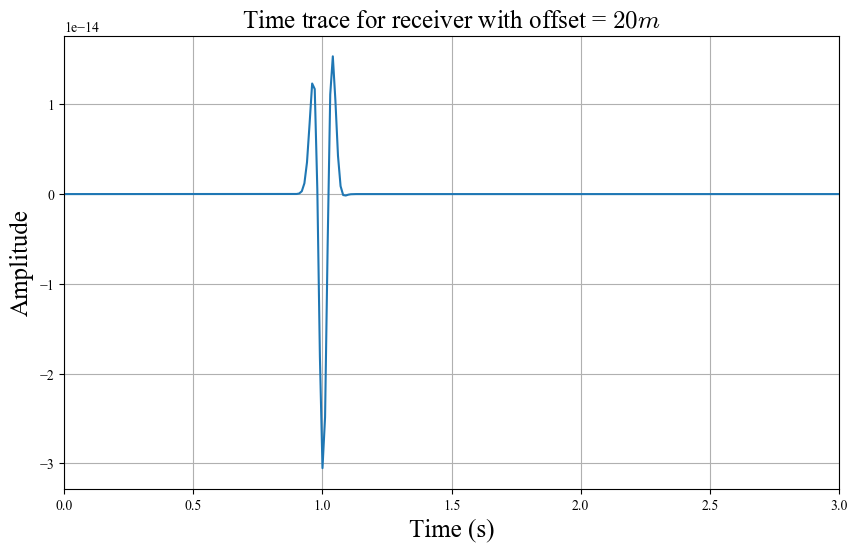

In [4]:
FIG = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(TIME_AXIS, TRACES[:, 0])
plt.title(r"Time trace for receiver with offset = $" + str(RI[0]) + "m$", fontsize=18)
plt.xlabel(r"Time (s)", fontsize=18)
plt.ylabel(r"Amplitude", fontsize=18)
plt.xlim([0, 3])
plt.grid()
plt.show()

## Plot for trace located $1000 m$ away from the source

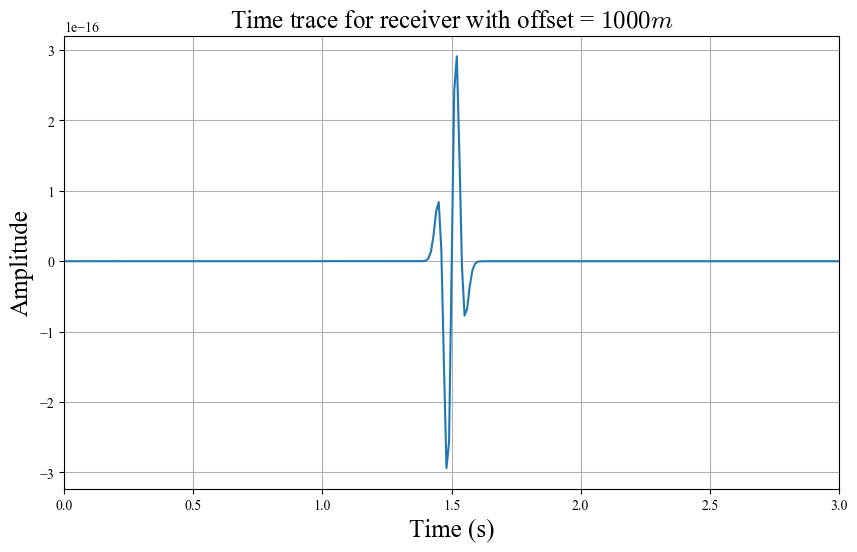

In [5]:
FIG = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(TIME_AXIS, TRACES[:, 49])
plt.title(r"Time trace for receiver with offset = $" + str(RI[49]) + "m$", fontsize=18)
plt.xlabel(r"Time (s)", fontsize=18)
plt.ylabel(r"Amplitude", fontsize=18)
plt.xlim([0, 3])
plt.grid()
plt.show()

## Plot for trace located $2000 m$ away from the source

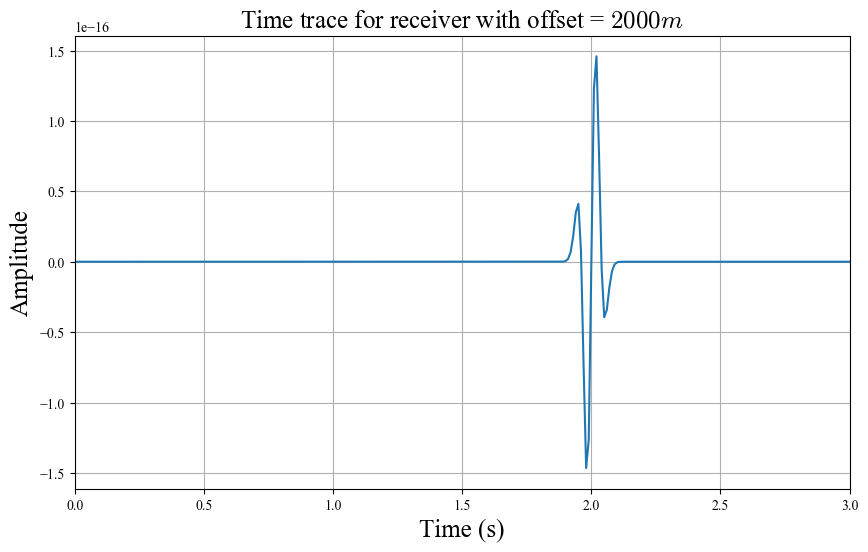

In [6]:
FIG = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(TIME_AXIS, TRACES[:, 99])
plt.title(r"Time trace for receiver with offset = $" + str(RI[99]) + "m$", fontsize=18)
plt.xlabel(r"Time (s)", fontsize=18)
plt.ylabel(r"Amplitude", fontsize=18)
plt.xlim([0, 3])
plt.grid()
plt.show()  